In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

In [3]:
class BrownDwarf(object):
    def __init__(self, ra, dec, distance, name, temp=False):
        ''' 
        Brown Dwarf object
        Attributes
        ----------
        ra          : float, degrees
        dec         : float, degrees
        distance    : float, in kpc
        name        : string, name of object
        temp        : float (optional), in K
        '''
        self.ra=ra
        self.dec=dec
        self.dist=distance
        self.name = name
        self.pos=SkyCoord(ra=self.ra*u.degree,dec=self.dec*u.degree, distance=self.dist*u.pc,  frame='icrs')


        if temp:
            self.temp=temp

    # def cart_bd_pos(self):
    #     '''Calculate cartesian position of BD using skycoord'''
    #     self.x = self.pos.cartesian.x
    #     self.y = self.pos.cartesian.y
    #     self.z = self.pos.cartesian.z

    def get_xyz(self):
        gal=self.pos.transform_to('galactic')
        # x = self.dist*u.pc * np.cos(np.deg2rad(90*u.deg-gal.b)) * np.cos(np.deg2rad(gal.l -90*u.deg))
        # y = self.dist*u.pc * np.cos(np.deg2rad(90*u.deg-gal.b)) * np.sin(np.deg2rad(gal.l -90*u.deg))
        # z = self.dist*u.pc * np.sin(np.deg2rad(90*u.deg-gal.b) )
        x = gal.cartesian.x.to(u.pc).value
        y = gal.cartesian.y.to(u.pc).value
        z = gal.cartesian.z.to(u.pc).value
        print(f'l is {gal.l}')
        print(f'b is {gal.b}')
        print(f'distance is{self.dist}')
        self.x = x
        self.y = y
        self.z = z

    
    
    def plot_bd(self, **kwargs ):   
        # intialize plot 
        fig = plt.figure(figsize = (10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.view_init(elev = 0, azim=125)  
        label_pad = 10
        ax.set_xlabel('X [pc]',labelpad = label_pad)
        ax.set_ylabel('Y [pc]',labelpad = label_pad)
        ax.set_zlabel('Z [pc]',labelpad = label_pad)
        # static sun plot
        sc_static = ax.scatter(0,0,0, color="yellow", label="Sun")

        ax.set_xlim(-10,10)
        ax.set_ylim(-10,10)
        ax.set_zlim(-10,10)
        for side in ['top', 'bottom', 'left', 'right']:
            ax.spines[side].set(lw=2.0)
        

        x,y,z = self.ra, self.dec, self.dist
        ax_object = ax.scatter(x,y,z, color = 'red', label = self.name)
        ax.legend()
        plt.show()






In [4]:
bd=BrownDwarf(162,-53,2,'my_bd')

In [5]:
bd.pos

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (162., -53., 2.)>

In [6]:
bd.get_xyz()

l is 284.86592131741827 deg
b is 5.486783631906607 deg
distance is2


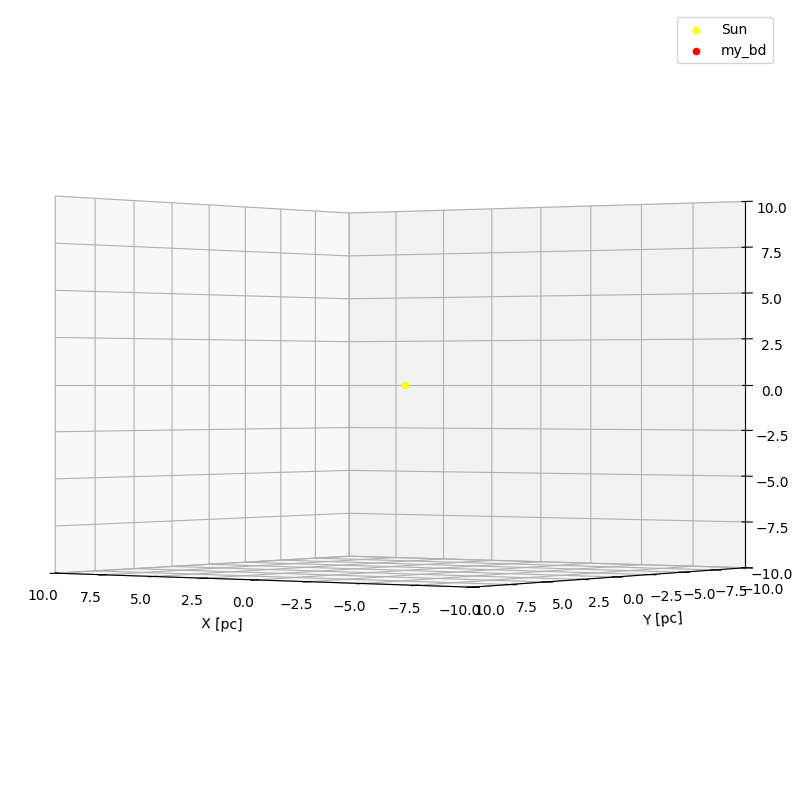

In [7]:
bd.plot_bd()

In [8]:
bd.get_xyz()

l is 284.86592131741827 deg
b is 5.486783631906607 deg
distance is2
